# Neuroimaging : 
<br>
# Structural MRI introduction
<br><br>

### 조강익

- Jupyter presentation : https://github.com/damianavila/RISE

In [48]:
#inside an IPython notebook
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

%pylab inline

def show_image(x, y, z, path ):
    import nibabel as nb
    import numpy as np
    import matplotlib.pyplot as plt
    img = nb.load(path)
    img_data = img.get_data()
    
    fig = plt.figure(figsize = (20, 20)) 
    plt.subplot(1, 3, 1)
    plt.imshow(np.rot90(img_data[:,:,z]),
                        cmap = plt.cm.gray,
                        interpolation = 'nearest'
                        )
    plt.subplot(1, 3, 2)
    plt.imshow(np.rot90(img_data[:,y,:]),
                        cmap = plt.cm.gray,
                        interpolation = 'nearest'
                        )
    plt.subplot(1, 3, 3)
    plt.imshow(np.rot90(img_data[x,:,:]),
                        cmap = plt.cm.gray,
                        interpolation = 'nearest'
                        )
    
    
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Contents

- MRI scan session

- Structural image
    - Types
    - Preproessing
    - Use

- 실습

# MRI scan session

<img src="http://www.fairview.org/fv/groups/public/documents/images/95150.jpg" width=600>
<img source : http://www.fairview.org/fv/groups/public/documents/images/95150.jpg>

## Optimal MRI scan session sequence

- Localizer (Scout)

- Structural image

- Field map

- Functional image

- Diffusion weighted image

- Extra images

## Problems

- 정보
    - 시력
    - 설문지
    - Consent forms
- 안심시켜야함
<img src="http://www.mnc.umd.edu/sites/default/files/images/facilities/mri-2.png" width=1000>


- MRI 선생님
    - 실무자의 파워
        - Data quality
        - Expensive sessions


- 피험자 움직임
    - "움직이면 쏜다..."


<img src="http://www.elec.canterbury.ac.nz/research/imaging/graphics/mri_pair.jpg" width=700>

- 데이타 체크 및 백업
    - 잘린부분
    - motion
    - missing files

## Practical MRI scan session

* **공손하게 인사**


* **Consent forms + other information collection**

* **Remove metal / eye sight test**

* **Explain how important it is to stay still during scans**

- Localizer (Scout)
- Structural image
- Field map

- **Data check**

* **Explain how important it is to stay still during scans**

- Functional image
- Diffusion weighted image
- Extra images
- **Data collection**

#GIGO

In [1]:
from IPython.display import IFrame
IFrame('http://en.wikipedia.org/wiki/Garbage_in,_garbage_out', width=1000, height=350)

## Structural image

## Resolution

- High spatial resolution

<img src="http://www.nzbri.org/research/labs/mristatic/web_3TMRI_html_m3cf3a36c.jpg" width=600>

fMRI
<img src="http://www.psychology.gatech.edu/cabi/Resources/Protocols/images/fmri.jpg" width=600>

## Different types of sMRI

- T1 & T2
<img src="http://cfile27.uf.tistory.com/image/133C254E4E5C96AE35D7AF" width=600>
<br><br><br><br>


- Diffusion weighted images
<img src="http://2.bp.blogspot.com/-Yl2JJQjcJRM/UMJKUm-hs0I/AAAAAAAAAIU/1D2zBVUiklA/s400/diffusion_weighted_images_in_three_diffusion_directions.jpg" width=600>
<br><br><br><br>


    - Diffusion tensor image
<img src = "http://www.med.lu.se/var/plain/storage/images/media/images/bilder_klinvet_lund/bilder_mr_fysik/principal_diffusion_encoding_directions_in_an_rgb_map/171729-1-eng-GB/principal_diffusion_encoding_directions_in_an_rgb_map.jpg" width=600>

- Myelin images
<img src="http://list.snu.ac.kr/vista.gif" width=600>

### fMRI에도 sMRI가 필요한 이유


- 활성 위치를 얻을 수 있지만, resolution이 낮아 어느 부위에 activation이 있는지 잘 알지 못한다.
    - 활성 위치를 조금 더 정확하게 알기위하여 sMRI를 사용한다.

- 가설을 가지고 있는 구조의 활성만 살피고 싶다.
    - ROI analysis

# Registration
<br>
## 한 피험자의 sMRI와 fMRI를 맞추기
<br>
왜 ? 
- Different images are 
- in difference spaces(sizes)

### Registration
1. 3D image in a space
2. transformation (registration)
3. different space

# fMRI and sMRI from one subject
<img src="registration1.png" width=800>
Img 출처 : FSL

### Rotation (x,y,z) + displace (x,y,z) + Scaling (x,y,z)
(linear transformation)
<br><br>

### Voxel location = anatomical location
<img src="registration2.png" width=800>
Img 출처 : FSL

# Registration
<br>
## 다른 피험자들의 sMRI들을 맞추기
<br>
왜 ? 
- 서로 비교하기위해

<img src="http://cfile30.uf.tistory.com/image/2375DF49528CB07F283C84" width=800>

다른 것 
- 크기
- 모양
- **내부구조**

linear transformation으로는 내부구조의 모양까지 맞추기가 힘들다.

**이땐, non-linear transformation (FNIRT)을 사용**

## 예를 들어... MNI152 space

In [58]:
!fslview $FSLDIR/data/standard/MNI152_T1_1mm.nii.gz

<img src="mni152.png" width=1200>

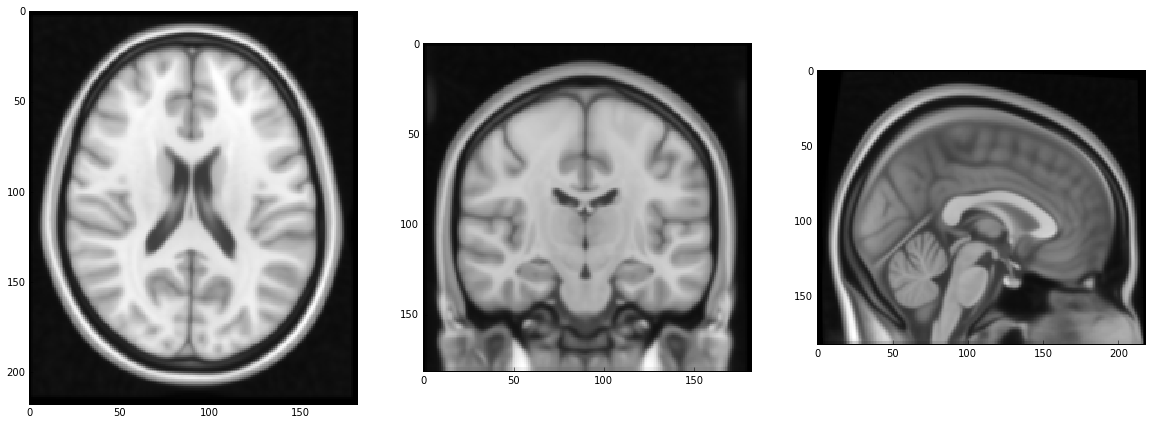

In [55]:
img = nb.load('/usr/local/fsl/data/standard/MNI152_T1_1mm.nii.gz').get_data()
interact(show_image, path = "/usr/local/fsl/data/standard/MNI152_T1_1mm.nii.gz",
         z=widgets.IntSliderWidget(min=0,max=img.shape[0]-1,step=1,value=img.shape[0]/2),
         y=widgets.IntSliderWidget(min=0,max=img.shape[1]-1,step=1,value=img.shape[1]/2),
         x=widgets.IntSliderWidget(min=0,max=img.shape[2]-1,step=1,value=img.shape[2]/2) )

<br>
###여기에 나의 뇌가 linear transformation 으로 맞춰질까?

- Look at the ventricle / corpus callosum

In [56]:
!fslview /Users/kcho/T1/20110928_185137TFL3D208SLABs002a1001_dim.nii.gz & fslview /usr/local/fsl/data/standard/MNI152_T1_1mm.nii.gz

- 크기
- 모양
- **내부구조**

# non-linear transformation 
- for topology preservation
<img src="linear_nonlinear.png" width=800>

# Diffusion tensor imaging

ppt

# 실습

## Thalamus (시상)에 해당하는 ROI를 잡은 후

## 그 부위의 BOLD signal들 extract 해보기 !

과정

- 시상의 ROI 그리기 (freesurfer)
- transformation matrix 구하기 (fsl)
- 시상의 BOLD signal 뽑아내기 (python)

- **fMRI preprocessing stage들은 이후에 배울 것이기 때문에 건너뛰고 진행**

# Required softwares

- Freesurfer (http://freesurfer.net)
- FSL (http://fsl.fmrib.ox.ac.uk)
- Python modules (numpy, scipy, pandas, nibabel, sympy, nipy, nipype)




## 실습 중 제일 
- 짜증나고 
- 귀찮고 
- 어려운 부분은 

- ###설치과정

# 시상의 ROI 그리기 (freesurfer)

<img src = "http://images.wisegeek.com/left-hand-outstretched.jpg" width=300>

- 오래걸림
- 비정확
- 사람마다 다름

# Freesurfer auto-segmentation

<img src="http://www.rb.org.br/imagens/v44n1a06-fig01.jpg" width=800>

1. 크기와 모양을 비슷하게 맞춘다
2. 미리 만들어놓은 도장으로 찍어낸다

<br>
8 시간 정도 걸림 ...

## Segmentation 진행
    recon-all -all -subjid Kevin -i T1.nii.gz  
    # Freesurfer command

## Thalamus ROI 뽑아내기
    mri_binarize --i /Users/kcho/T1/mri/aseg.mgz --match 10 --o thalamus.nii.gz 
    # 10 : Right thalamus

In [2]:
!mri_binarize --i /Users/kcho/T1/mri/aseg.mgz --match 10 --o thalamus.nii.gz 


$Id: mri_binarize.c,v 1.26.2.1 2011/04/08 15:40:50 greve Exp $
cwd /Users/kcho/Desktop/study
cmdline mri_binarize --i /Users/kcho/T1/mri/aseg.mgz --match 10 --o thalamus.nii.gz 
sysname  Darwin
hostname Kevins-MacBook-Pro.local
machine  x86_64
user     kcho

input      /Users/kcho/T1/mri/aseg.mgz
frame      0
nErode3d   0
nErode2d   0
output     thalamus.nii.gz
Binarizing based on matching values
nMatch 1
 0    10
binval        1
binvalnot     0
Found 9842 values in range
Counting number of voxels
Found 9842 voxels in final mask
mri_binarize done


### Image check

In [7]:
!fslview orig.nii.gz thalamus.nii.gz -l 'Red'

In [10]:
from nipype.interfaces import fsl

In [11]:
for img in ['thalamus.nii.gz','orig.nii.gz']:
    swapdim = fsl.utils.SwapDimensions()
    swapdim.inputs.in_file = img
    swapdim.inputs.out_file = img.split('.')[0]+'_dim'+'.nii.gz'
    swapdim.inputs.new_dims = ('RL', 'PA', 'IS')
    res = swapdim.run()


In [12]:
!fslview orig_dim.nii.gz thalamus_dim.nii.gz -l 'Red'

### For complete list of Freesrufer structures...

In [48]:
!cat /Applications/freesurfer/FreeSurferColorLUT.txt

# Transformation matrix 구하기 (fsl)


- 우리가 얻은 시상부위는 T1 space !
- 우리가 **원하는** BOLD 신호는 fMRI space !
- 시상 선택부위를 transform 해줘야한다 !


<img src="T1.png" width=1000>
에서 ...


<img src="REST.png" width=1000>
fMRI space 로 가는 matrix 계산하기!

## FSL BET + FLIRT with nipype

## BET

- Skull 없애기
- Skull이 없어야 정확한 registration 가능 !

### nipype import

In [14]:
from nipype.interfaces import fsl

### FSL BET 을 툴로 불러옴

In [15]:
btr = fsl.BET()

### 관련 파라미터 정의

In [18]:
btr.inputs.in_file = 'orig_dim.nii.gz'
btr.inputs.frac = 0.3
btr.inputs.out_file = 'T1_brain.nii.gz'

### 돌리기

In [19]:
res = btr.run()

### Image check

In [21]:
!fslview orig_dim.nii.gz -l "Red-Yellow" T1_brain.nii.gz

### Parameter change and re-run

In [22]:
# Parameter 바꾸기
btr.inputs.frac = 0.3
btr.inputs.center = [128, 113, 144]

# 다시 돌리기
res = btr.run()
!fslview orig_dim.nii.gz -l "Red-Yellow" T1_brain.nii.gz

# FLIRT - registration
- T1 시상을 fMRI 시상의 위치에 맞추는 transformation matrix 구하기
- transformation matrix 적용하기

## FLIRT를 툴로 불러오기

In [23]:
flt = fsl.FLIRT(cost_func='mutualinfo')

## Parameter 지정

In [24]:
flt.inputs.in_file = 'REST.nii.gz'

# Target image
flt.inputs.reference = 'T1_brain.nii.gz'

# Outputs
flt.inputs.out_file = 'REST_to_T1.nii.gz'      # used for checking the registration
flt.inputs.out_matrix_file = 'REST_to_T1.mat'  # What we want !

## Run FLIRT

In [25]:
res = flt.run()

## Image 확인

In [28]:
!fslview REST_to_T1.nii.gz -l "Red-Yellow" T1_brain.nii.gz -t 0.4

## T1 space 시상에 계산된 matrix 적용

In [ ]:
 fsl.FLIRT.help()

## Matrix 뒤집기

- 아까 계산된 matrix는 REST를 T1에 맞췄던 것
- 이를 뒤집으면 T1 --> Rest가 됨

### ConvertXFM tool 불러오기

In [52]:
invt = fsl.ConvertXFM()

convert_xfm -omat T1_to_REST.mat -inverse REST_to_T1.mat


### Parameter setting

In [ ]:
invt.inputs.in_file = 'REST_to_T1.mat'
invt.inputs.invert_xfm = True
invt.inputs.out_file = 'T1_to_REST.mat'

### Linux에서 사용했으면 ... 어떨까

In [ ]:
print invt.cmdline

### Run invert !

In [ ]:
invt.run()

## 이제 Thalamus를 Transform !!

In [60]:
flt = fsl.FLIRT(cost_func='mutualinfo')

flt.inputs.in_file = 'thalamus_dim.nii.gz'

# Target space
flt.inputs.reference = 'REST.nii.gz'

flt.inputs.out_file = 'thalamus_rest_space.nii.gz'

# Transformation matrix
flt.inputs.in_matrix_file = 'T1_to_REST.mat'
flt.inputs.apply_xfm = True

flt.inputs.interp = 'nearestneighbour'

print flt.cmdline
res = flt.run()

flirt -in thalamus_dim.nii.gz -ref REST.nii.gz -out thalamus_rest_space.nii.gz -omat thalamus_dim_flirt.mat -applyxfm -searchcost mutualinfo -dof 6 -init T1_to_REST.mat -interp nearestneighbour


## Data check

In [63]:
!fslview REST.nii.gz thalamus_rest_space.nii.gz -l "Red"

### Thalamus signal extraction

In [81]:
maths = fsl.ImageMaths()

maths.inputs.in_file = 'REST.nii.gz'
maths.inputs.op_string = '-mas thalamus_rest_space.nii.gz'
maths.inputs.out_file = 'REST_thalamus.nii.gz'
print maths.cmdline

res = maths.run()

fslmaths REST.nii.gz -mas thalamus_rest_space.nii.gz REST_thalamus.nii.gz


In [83]:
!fslview $res.outputs.out_file

### Thalamus BOLD information

### 1. fsl 이용

In [85]:
stats = fsl.ImageStats()

stats.inputs.in_file = 'REST_thalamus.nii.gz'

stats.inputs.op_string = '-r -S -M'
#stats.inputs.mask_file = 'thalamus_rest_space.nii.gz'

print stats.cmdline
res = stats.run()

INFO:interface:stdout 2015-04-28T05:38:54.123888:746.760010 1464.119995 163.797137 951.962188 


fslstats REST_thalamus.nii.gz -r -S -M


In [88]:
res.outputs


out_stat = [746.76001, 1464.119995, 163.797137, 951.962188]

In [92]:
for s,result in zip(['min','max','std','mean'],res.outputs.out_stat):
    print '{0} : {1}'.format(s, result)


min : 746.76001
max : 1464.119995
std : 163.797137
mean : 951.962188


### 2. nibabel 이용

In [43]:
import nibabel as nb

img = nb.load('REST_thalamus.nii.gz')
img_data = img.get_data()

Loading check

In [44]:
img_data.shape

(128, 128, 35, 116)

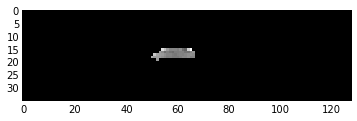

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 20))
plt.subplot(1, 3, 1)
plt.imshow(np.rot90(img_data[70,:,:,30]),cmap = plt.cm.gray, interpolation = 'nearest')

In [46]:
img_data

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0., 

# Parallel processing

<img src='http://www.macstadium.com/blog/wp-content/uploads/2013/06/macpro_background2.jpg' width=800>

- 서로 다른 사용자들
- 병렬화
- 자동 job dispatching
- 한 곳에만 software install
- 서로 direct하게 연결 하면서 internet 사용

#감사합니다.